In [1]:
import numpy as np
import os
import scipy
import math
import scipy.io.wavfile as wav
from scipy import signal
import matplotlib.pyplot as plt

from helper import *

In [2]:
# Enter here the path where the Matrix sentences are stored:
dir_where_AFC = "AFC_for_lectures_2022"
# dir_where_AFC = 'H:\\Desktop\\HearingLab4\\AFC_for_lectures_20200427'
filesep = os.path.sep
dir_where    = dir_where_AFC+filesep+'sounds'+filesep+'vlmatrix'+filesep+'00-original'+filesep # broadband VlMatrix material
dir_where_LP = dir_where_AFC+filesep+'sounds'+filesep+'vlmatrix'+filesep+'01-LP'+filesep # here you will store the LP files
print(f"dir where LP: {dir_where_LP}")
dir_where_HP = dir_where_AFC+filesep+'sounds'+filesep+'vlmatrix'+filesep+'02-HP'+filesep # here you will store the HP files
print(f"dir where HP: {dir_where_HP}")

dir where LP: AFC_for_lectures_2022\sounds\vlmatrix\01-LP\
dir where HP: AFC_for_lectures_2022\sounds\vlmatrix\02-HP\


In [3]:
freq_i  = 160*np.power(2, (1./3.)*np.arange(0,18)) # 18 frequencies spaced from 160 Hz and upwards in 1/3 OB
freq_i

array([ 160.        ,  201.58736798,  253.98416831,  320.        ,
        403.17473597,  507.96833663,  640.        ,  806.34947193,
       1015.93667326, 1280.        , 1612.69894387, 2031.87334652,
       2560.        , 3225.39788773, 4063.74669304, 5120.        ,
       6450.79577546, 8127.49338608])

In [4]:
### Processing one sound, the speech-shaped noise:
# 1. Loading the sound with the custo function audioread 
fname_noise = dir_where+'VlMatrixnoise_ltass.wav'
fs, noise = audioread(fname_noise)

# 2. Plotting the spectrum:
#    2.1 Fast Fourier Transform
N = 2**15
K = round(N/2)
noise_fft = np.fft.fft(noise,n=N)
noise_fft = noise_fft[0:K-1] # only first half of the FFT (the other half is mirrored)
f = np.arange(0,K-1)
f = f/K*(fs/2) # if you perform N-point FFTs you can use this f for all your plots

#    2.2 Converting to dB (note that the amplitudes are relative...):
# Spectrum:
noise_dB        = 20*np.log10(abs(noise_fft))
# Smoothed spectrum:
noise_dB_smooth = Oct3smooth(f, noise_dB, freq_i)

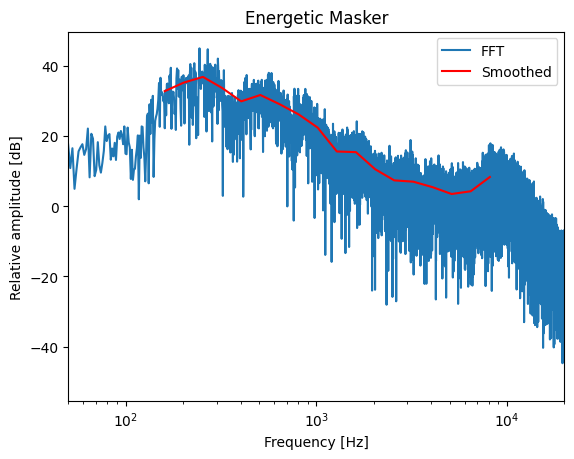

In [5]:
plt.semilogx(f, noise_dB)
plt.plot(freq_i, noise_dB_smooth, 'r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative amplitude [dB]')
plt.xlim((50,20000))
plt.title("Energetic Masker")
plt.legend(['FFT','Smoothed'])
plt.show()

AFC_for_lectures_2022\sounds\vlmatrix\00-original\
	 62 sounds were found
Loading sentence 00131.wav
Loading sentence 01597.wav
Loading sentence 01672.wav
Loading sentence 03841.wav
Loading sentence 05780.wav
Loading sentence 09091.wav
Loading sentence 11772.wav
Loading sentence 12383.wav
Loading sentence 13331.wav
Loading sentence 16266.wav
Loading sentence 18004.wav
Loading sentence 19903.wav
Loading sentence 20736.wav
Loading sentence 21138.wav
Loading sentence 24088.wav
Loading sentence 24459.wav
Loading sentence 28515.wav
Loading sentence 29523.wav
Loading sentence 31109.wav
Loading sentence 32364.wav
Loading sentence 35933.wav
Loading sentence 38957.wav
Loading sentence 39049.wav
Loading sentence 39851.wav
Loading sentence 43590.wav
Loading sentence 43668.wav
Loading sentence 43841.wav
Loading sentence 45858.wav
Loading sentence 47370.wav
Loading sentence 47874.wav
Loading sentence 50526.wav
Loading sentence 54584.wav
Loading sentence 56264.wav
Loading sentence 56265.wav
Loading 

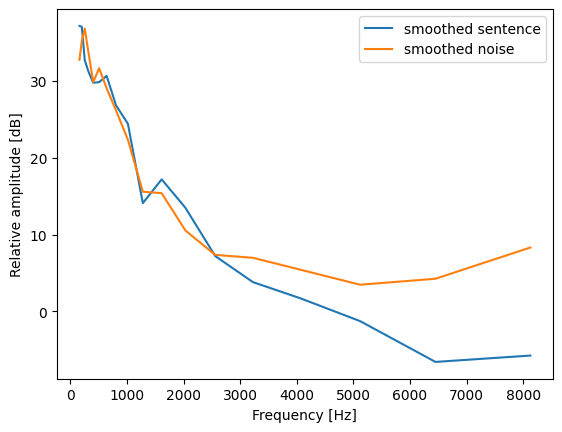

In [69]:
# Cell [6]: Include your code here to add the spectrum of one sentence from the materials. 
#           It may be helpful to add in the same plot the noise spectrum. Please choose a
#           clear way to visualise the sentence and noise spectra.

# Some help: 'insig1 = SpeechArray(dir_where,1)' will give you one sentence at random, alternatively 
#                you can also load insig1 as done in Cell[5] with 'noise' using audioread
#            'insig10= SpeechArray(dir_where,10)' will give you 10 sentences at random 

insig1 = SpeechArray(dir_where, 1) #  (directory, number of sentences at random)  ->   dir where 00-original, 1 sentence at random

insig1_fft = np.fft.fft(insig1, n=N)
insig1_fft = insig1_fft[0:K-1] # only first half of the FFT (the other half is mirrored)

#    2.2 Converting to dB (note that the amplitudes are relative...):
insig1_dB        = 20*np.log10(abs(insig1_fft)) # Spectrum
insig1_dB_smooth = Oct3smooth(f,insig1_dB,freq_i) # Smoothed spectrum

# plotting
# plt.semilogx(f, insig1_dB, label="sentence")
# plt.semilogx(f, noise_dB, label="noise", alpha=0.7)
plt.plot(freq_i, insig1_dB_smooth, label="smoothed sentence")
plt.plot(freq_i, noise_dB_smooth, label="smoothed noise")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative amplitude [dB]')
# plt.xlim((50,20000))
plt.legend()
plt.show()


AFC_for_lectures_2022\sounds\vlmatrix\00-original\
	 62 sounds were found
Loading sentence 00131.wav
Loading sentence 01597.wav
Loading sentence 01672.wav
Loading sentence 03841.wav
Loading sentence 05780.wav
Loading sentence 09091.wav
Loading sentence 11772.wav
Loading sentence 12383.wav
Loading sentence 13331.wav
Loading sentence 16266.wav
Loading sentence 18004.wav
Loading sentence 19903.wav
Loading sentence 20736.wav
Loading sentence 21138.wav
Loading sentence 24088.wav
Loading sentence 24459.wav
Loading sentence 28515.wav
Loading sentence 29523.wav
Loading sentence 31109.wav
Loading sentence 32364.wav
Loading sentence 35933.wav
Loading sentence 38957.wav
Loading sentence 39049.wav
Loading sentence 39851.wav
Loading sentence 43590.wav
Loading sentence 43668.wav
Loading sentence 43841.wav
Loading sentence 45858.wav
Loading sentence 47370.wav
Loading sentence 47874.wav
Loading sentence 50526.wav
Loading sentence 54584.wav
Loading sentence 56264.wav
Loading sentence 56265.wav
Loading 

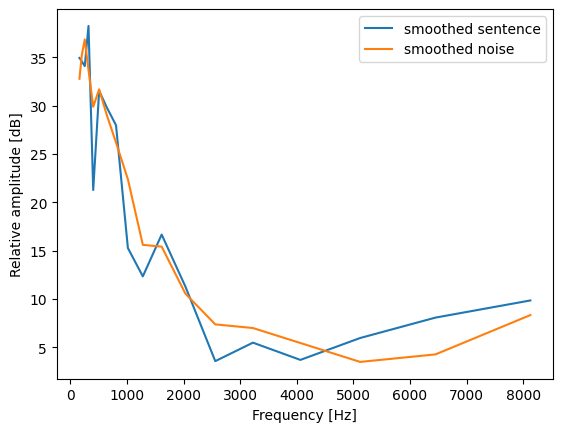

In [70]:
# Cell [7]: Include your code here to add the spectrum of 20 randomly chosen sentences. 
#           This code will be similar to that of cell [6] but you have to put first 
#           the 20 sentences all together as one big sentence (use the SpeechArray function
#           from helper.py)

insig20 = SpeechArray(dir_where, 20) #  (directory, number of sentences at random)  ->   dir where 00-original, 1 sentence at random
print(f"\n\n{insig20.shape}\n")

insig20_fft = np.fft.fft(insig20, n=N)
insig20_fft = insig20_fft[0:K-1] # only first half of the FFT (the other half is mirrored)

#    2.2 Converting to dB (note that the amplitudes are relative...):
insig20_dB        = 20*np.log10(abs(insig20_fft)) # Spectrum
insig20_dB_smooth = Oct3smooth(f,insig20_dB,freq_i) # Smoothed spectrum

audiowrite(insig20, fs=fs, fname=f"{dir_where}insig_20concat.wav")

# plotting
# plt.semilogx(f, insig20_dB, label="sentence")
# plt.semilogx(f, noise_dB, label="noise", alpha=0.7)
plt.plot(freq_i, insig20_dB_smooth, label="smoothed sentence")
plt.plot(freq_i, noise_dB_smooth, label="smoothed noise")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative amplitude [dB]')
# plt.xlim((50,20000))
plt.legend()
plt.show()

In [71]:
# Cell [8]: Include your code here to assess the speech intelligibility index for LPF signals 
# f2test = [] # Hz, define here the 20 cut-off frequencies you want to test...
f2test = np.logspace(np.log10(100), np.log10(10000), 20) 
print(f"cut-off frequencies: {f2test}")

fc_low = [] # Hz, write down here (or later in the code), the cut-off frequency that gives an SII_value of 0.75

#         -> SII: speach intellegibility index: amount of a given speech signal that is audible to a listener

cut-off frequencies: [  100.           127.42749857   162.37767392   206.91380811
   263.66508987   335.98182863   428.13323987   545.55947812
   695.19279618   885.86679041  1128.83789168  1438.44988829
  1832.98071083  2335.72146909  2976.35144163  3792.69019073
  4832.93023857  6158.48211066  7847.59970351 10000.        ]


In [72]:
# Cell [9]: Include your code here to assess the speech intelligibility index for HPF signals 
# f2test = [] # Hz, define here the 20 cut-off frequencies you want to test...

fc_high = [] # Hz, write down here (or later in the code), the cut-off frequency that gives an SII_value of 0.75

The SII of the bands: 0.21992254962673585
The SII of the bands: 1.0
The SII of the bands: 0.27048856785208336
The SII of the bands: 1.0
The SII of the bands: 0.3177386956430631
The SII of the bands: 0.9980687967855308
The SII of the bands: 0.3760323897557881
The SII of the bands: 0.9930797455402716
The SII of the bands: 0.45243476967671126
The SII of the bands: 0.9848599344747162
The SII of the bands: 0.5376283213132401
The SII of the bands: 0.9615762890272488
The SII of the bands: 0.6270652065028479
The SII of the bands: 0.9357144511632303
The SII of the bands: 0.7059515087846673
The SII of the bands: 0.9090841296362839
The SII of the bands: 0.78520549329601
The SII of the bands: 0.8565300618095665
The SII of the bands: 0.8687043612775289
The SII of the bands: 0.7739503575718905
The SII of the bands: 0.9210504496331937
The SII of the bands: 0.6717840499237198
The SII of the bands: 0.9549350624685773
The SII of the bands: 0.5544224718016628
The SII of the bands: 0.9744388776438735
The 

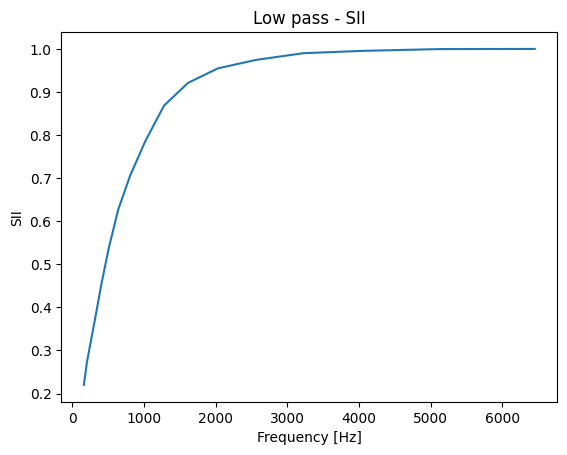

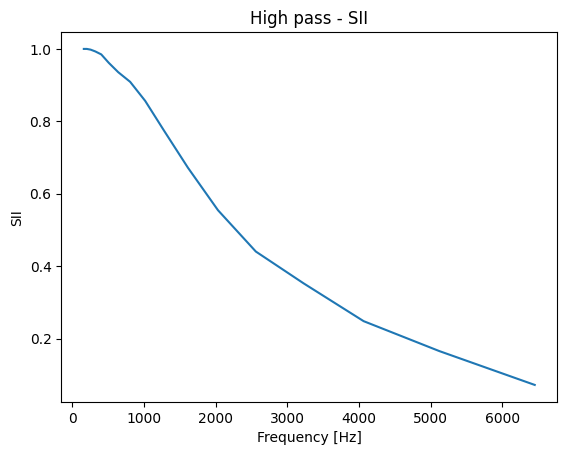

In [73]:
# Cell [10]
filt_order = 4 # order of the Butterworth filter, use the same order for both LPF and HPF speech
# lijsten = os.listdir(dir_where)

dir_here = dir_where_LP
dir_here_high = dir_where_HP

SII_vals = []
SII_vals_high = []
outp_lp = []
outp_hp = []

for i in range(17): # 18 frequencies -1 -> to normalize we only get to the second to last freq
    norm_fc_low = (f2test[i]/f2test[-1])
    norm_fc_high = (f2test[i]/f2test[-1])

    b, a = signal.butter(filt_order, norm_fc_low, 'low')
    b_high, a_high = signal.butter(filt_order, norm_fc_high, 'high')

    # Filter here each insig using b and a coefficients
    Filtered_sig = signal.lfilter(b, a, insig20)
    Filtered_sig_high = signal.lfilter(b_high, a_high, insig20)

    sig_fft = np.fft.fft(Filtered_sig, n=N) # FFT of the filtered signal
    sig_fft = sig_fft[0:K-1] # only first half of the FFT (the other half is mirrored)

    sig_fft_high = np.fft.fft(Filtered_sig_high, n=N) # FFT of the filtered signal
    sig_fft_high = sig_fft_high[0:K-1] # only first half of the FFT (the other half is mirrored)

    # Spectrum:
    f = np.arange(0, K-1)
    f = f/K*(fs/2) # if you perform N-point FFTs you can use this f for all your plots

    sig_dB = 20*np.log10(abs(sig_fft)) # converting to dB
    sig_dB_smooth = Oct3smooth(f, sig_dB, freq_i) # smoothing
    outp_lp.append(sig_dB_smooth)

    sig_dB_high = 20*np.log10(abs(sig_fft_high)) # converting to dB
    sig_dB_high_smooth = Oct3smooth(f, sig_dB_high, freq_i) # smoothing
    outp_hp.append(sig_dB_high_smooth)

    # Save the resulting waveforms to file in the directory 'dir_where_LP', use 'audiowrite'
    audiowrite(Filtered_sig, fs=fs, fname=f"{dir_here}filtered_20concat.wav")
    audiowrite(Filtered_sig_high, fs=fs, fname=f"{dir_here_high}filtered_20concat_high.wav")

# calculating SSI values
for i in range(17):
    val = SII(outp_lp[i])
    val_high = SII(outp_hp[i])

    SII_vals.append(val)
    SII_vals_high.append(val_high)
    
    if (val > 0.74 and val < 0.76):  # if the SII value is near 0.75 -> get it into the fc_low list 
        fc_low.append(outp_lp[i][i])

    if (val_high > 0.74 and val_high < 0.76):  # if the SII value is near 0.75 -> get it into the fc_low list 
        fc_high.append(outp_hp[i][i])


# plotting LP SII
plt.plot(freq_i[:-1], SII_vals)
plt.xlabel('Frequency [Hz]')
plt.ylabel('SII')
plt.title("Low pass - SII")
plt.show()

# plotting HP SII
plt.plot(freq_i[:-1], SII_vals_high)
plt.xlabel('Frequency [Hz]')
plt.ylabel('SII')
plt.title("High pass - SII")
plt.show()

In [74]:
# If everything went as expected your low-pass filtered and high-pass filtered speech should be in the folders
#     01-LP/
#     02-HP/
#     00-original/ (broadband files, already available)

# Don't forget to listen to your sounds to know how LP and HP speech sounds like
# Now you should be ready to start the AFC experiment, go to MATLAB!

# Success!